<a href="https://colab.research.google.com/github/usman-babar/BigMart-Product-Outlet-Sales-Analysis-and-Prediction-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project**

# **Problem Statement**

The problem is to build a predictive model to determine the sales of each product at different stores.

# **Hypothesis Generation**

Generate hypotheses about the factors that might influence sales based on prior knowledge and understanding of the data. For example, the location of the store, product attributes, promotions, and store size could be potential factors.

In [71]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


# **Loading Packages and Data**

In [19]:
# Load the data into a DataFrame
data_url = 'https://drive.google.com/file/d/1qHTYFy5lLTfzSH2x6j8OZYsKvWWrDqXp/view?usp=drive_link'
file_id = data_url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_url)

print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

Drop Duplicate Values

In [23]:
df = df.drop_duplicates()


Sort on the basis of **Item_Outlet_Sales**

In [24]:
# Sort the DataFrame based on Item_Outlet_Sales column in descending order
sorted_df = df.sort_values(by='Item_Outlet_Sales', ascending=False)

# Print the table
print(sorted_df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7188           NCE42          NaN          Low Fat         0.010551   
5223           FDQ19          NaN          Regular         0.014296   
1450           FDZ20          NaN          Low Fat         0.000000   
4349           FDP33          NaN          Low Fat         0.088840   
6541           FDI50          NaN          Regular         0.030693   
...              ...          ...              ...              ...   
7388           FDQ47        7.155          Regular         0.281510   
3053           NCL41          NaN          Low Fat         0.073077   
2571           FDU21          NaN          Regular         0.134328   
6950           NCR42        9.105          Low Fat         0.064411   
906            DRK12        9.500          Low Fat         0.000000   

                  Item_Type  Item_MRP Outlet_Identifier  \
7188              Household  234.9958            OUT027   
5223  Fruits and Vegetables  

**Converting sorted Dataframe to table**

In [25]:
# Convert sorted DataFrame to a table format
table = tabulate(sorted_df, headers='keys', tablefmt='psql')

# Print the sorted table
print(table)

+------+-------------------+---------------+--------------------+-------------------+-----------------------+------------+---------------------+-----------------------------+---------------+------------------------+-------------------+---------------------+
|      | Item_Identifier   |   Item_Weight | Item_Fat_Content   |   Item_Visibility | Item_Type             |   Item_MRP | Outlet_Identifier   |   Outlet_Establishment_Year | Outlet_Size   | Outlet_Location_Type   | Outlet_Type       |   Item_Outlet_Sales |
|------+-------------------+---------------+--------------------+-------------------+-----------------------+------------+---------------------+-----------------------------+---------------+------------------------+-------------------+---------------------|
| 7188 | NCE42             |       nan     | Low Fat            |        0.0105509  | Household             |   234.996  | OUT027              |                        1985 | Medium        | Tier 3                 | Supermarke

# **Exploratory Data Analysis**

Handle Missing value

In [22]:
# Replace null and NaN values with column means
df_filled = df.fillna(df.mean())

# Convert filled DataFrame to a table format
table = tabulate(df_filled, headers='keys', tablefmt='psql')

# Print the filled table
print(table)

<ipython-input-22-577afed501ec>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


+------+-------------------+---------------+--------------------+-------------------+-----------------------+------------+---------------------+-----------------------------+---------------+------------------------+-------------------+---------------------+
|      | Item_Identifier   |   Item_Weight | Item_Fat_Content   |   Item_Visibility | Item_Type             |   Item_MRP | Outlet_Identifier   |   Outlet_Establishment_Year | Outlet_Size   | Outlet_Location_Type   | Outlet_Type       |   Item_Outlet_Sales |
|------+-------------------+---------------+--------------------+-------------------+-----------------------+------------+---------------------+-----------------------------+---------------+------------------------+-------------------+---------------------|
|    0 | FDA15             |        9.3    | Low Fat            |        0.0160473  | Dairy                 |   249.809  | OUT049              |                        1999 | Medium        | Tier 1                 | Supermarke

**Handling Outlier**

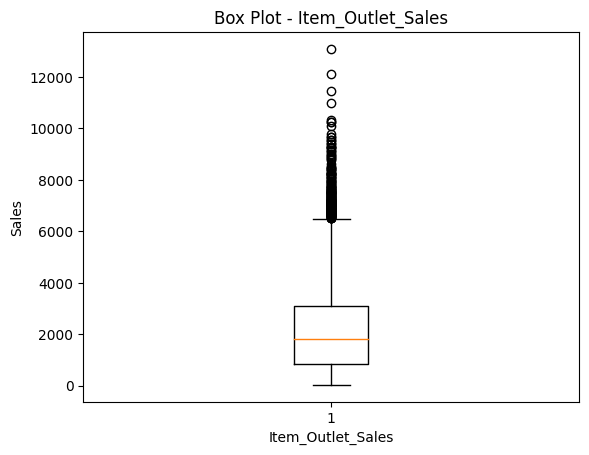

In [31]:
# Create a box plot to visualize outliers in Item_Outlet_Sales
plt.boxplot(sorted_df['Item_Outlet_Sales'])
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Sales')
plt.title('Box Plot - Item_Outlet_Sales')
plt.show()

**Drop the outlier value**

In [53]:
# Calculate descriptive statistics for Item_Outlet_Sales
newDF = df_filled['Item_Outlet_Sales'].describe()

# Identify the outlier threshold as 1.5 times the interquartile range (IQR)
Q1 = newDF['25%']
Q3 = newDF['75%']
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

# Drop the outlier values from the DataFrame
df_filtered = df_filled[df_filled['Item_Outlet_Sales'] < (Q1 - outlier_threshold)]
df_filtered = df_filtered.append(df_filled[df_filled['Item_Outlet_Sales'] > (Q3 + outlier_threshold)])


# Print the filtered DataFrame without outliers
print(df_filtered)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02    21.350000          Low Fat         0.069103   
130            FDY25    12.857645          Low Fat         0.033810   
132            NCR53    12.857645          Low Fat         0.144338   
145            FDP16    18.600000          Low Fat         0.039356   
203            FDI24    12.857645          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55    16.200000          Low Fat         0.035967   
8329           NCQ06    12.857645          Low Fat         0.041622   
8350           NCE18    10.000000          Low Fat         0.021421   
8447           FDS26    20.350000          Low Fat         0.089975   
8510           FDN58    13.800000          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018   
130                  Canned  

<ipython-input-53-4051e0f2decf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_filled[df_filled['Item_Outlet_Sales'] > (Q3 + outlier_threshold)])


### **Univariate Analysis**

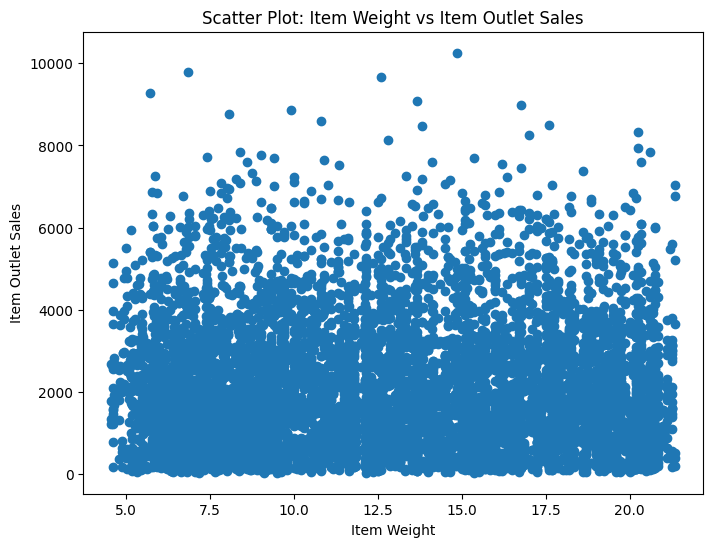

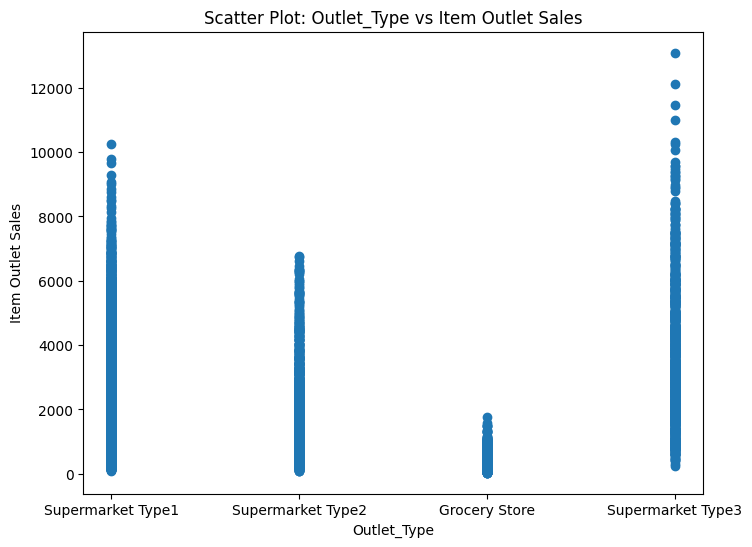

In [50]:

# Create a scatter plot for Item_Weight vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item Weight vs Item Outlet Sales')
plt.show()

# Create a scatter plot for Item_Weight vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Outlet_Type'], df['Item_Outlet_Sales'])
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Outlet_Type vs Item Outlet Sales')
plt.show()

# **Bivariate Analysis**

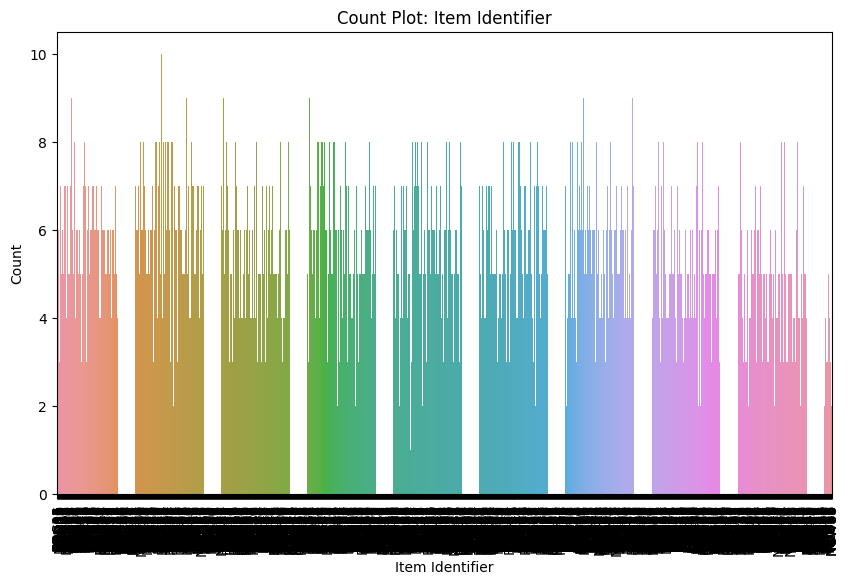

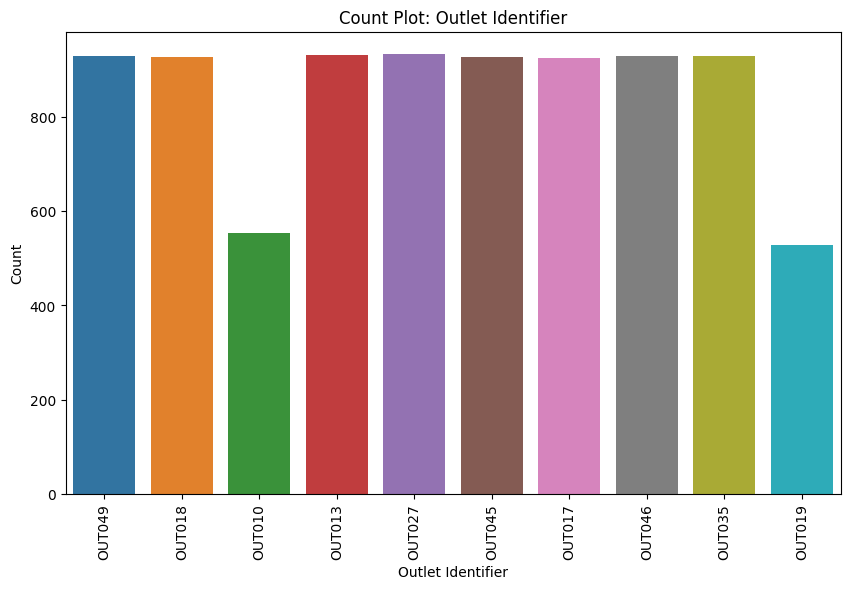

In [46]:
# Create a count plot for Item_Identifier
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Item_Identifier')
plt.xlabel('Item Identifier')
plt.ylabel('Count')
plt.title('Count Plot: Item Identifier')
plt.xticks(rotation=90)
plt.show()

# Create a count plot for Outlet_Identifier
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outlet_Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Count')
plt.title('Count Plot: Outlet Identifier')
plt.xticks(rotation=90)
plt.show()

In [58]:
# # Group the data by Item_Identifier and Outlet_Identifier and calculate the total sales
# sales_by_product_store = df.groupby(['Item_Identifier', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum()

# # Print the sales of each product at each store
# print(sales_by_product_store)

# **Label Encoding**

In [60]:
data_encoded = pd.get_dummies(df_filled, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


label_encoder = LabelEncoder()
categorical_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for var in categorical_vars:
    df_filled[var] = label_encoder.fit_transform(df_filled[var])


print (df_filled)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

# **Linear Regression**

In [75]:
df = df_filled

selected_columns = ["Item_Weight", "Item_MRP", "Outlet_Size", "Item_Outlet_Sales"]
df_selected = df[selected_columns]

# Handle missing values in the selected columns
df_selected = df_selected.fillna(df_selected.mean())

# Encode categorical variables if needed

# Split the data into training and testing sets
X = df_selected.drop("Item_Outlet_Sales", axis=1)
y = df_selected["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


Mean Squared Error: 1760774.2713216154
R-squared Score: 0.3521730452633741


# **Regularized Linear Regression**

In [76]:
ridge_regressor = Ridge(alpha=0.5)

ridge_regressor.fit(X_train, y_train)

ridge_y_pred = ridge_regressor.predict(X_test)


ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
print('Ridge Regression:')
print('Mean Squared Error:', ridge_mse)
print('R-squared Score:', ridge_r2)


Ridge Regression:
Mean Squared Error: 1760771.7207026253
R-squared Score: 0.3521739836912918


# **RandomForest**

In [77]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 1675262.4776636069
R-squared Score: 0.38363468448755145


# **XGBoost**

In [78]:
data = df_filled

X = data[["Item_Weight", "Item_MRP", "Outlet_Size", "Item_Outlet_Sales"]]
y = data['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'reg:squarederror',  # Objective for regression task
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of each tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'seed': 42  # Random seed for reproducibility
}

num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred = xgb_model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


Mean Squared Error: 1985.0462059910365
R-squared Score: 0.9992696585476153


# **Models Outputs:**

Linear Regression: 

    Mean Squared Error: 1760774.2713216154
    R-squared Score: 0.3521730452633741

Regularized Linear Regression:

    Ridge Regression:
    Mean Squared Error: 1760774.2713216154
    R-squared Score: 0.3521730452633741

Random Forest:

    Mean Squared Error: 1675262.4776636069
    R-squared Score: 0.38363468448755145

XG BOOST:

    Mean Squared Error: 1985.0462059910365
    R-squared Score: 0.9992696585476153